# Import Required Libraries

In [214]:
import math
import scipy.stats as ss
import numpy as np
import pandas as pd

# Obtain Analytical Result

In [215]:
def black_scholes(S, K, T, r, vol):
    d1 = (math.log(S/K) + (r + 0.5*vol*vol)*T) / (vol * math.sqrt(T))
    N1 = ss.norm.cdf(d1)
    d2 = d1 - vol * math.sqrt(T)
    N2 = ss.norm.cdf(d2)
    
    C = S * N1 - K * math.exp(-r*T) * N2
    
    return C

In [216]:
bs = round(black_scholes(100,120,1,0.05,0.2) * 1000, 2)
print("%5.2f" % bs)

3247.48


# Single Simulation

In [217]:
def simulate(S, K, T, r, vol, notional, n):

    L = []
    t = T
    dt = 1/n
    delta_notional_prev = 0
    pv = 0

    for i in range(n+1):

        if i == n:
            N1 = 1 if S > K else 0
        else:    
            N1 = ss.norm.cdf(
                (math.log(S/K) + (r + 0.5*vol*vol)*T) / 
                (vol * math.sqrt(T))
            )

        delta_notional = round(notional * N1, 0)
        delta_value = round(notional * N1 * S, 2)
        delta_cash = -round(
            (delta_notional - delta_notional_prev) * S
        , 2)

        if i == n and N1 == 1:
            delta_cash += notional * K

        #print("%3d %6.2f %4d %9.2f %10.2f" % (
        #    i, S, delta_notional, delta_value, delta_cash
        #))

        pv += round(-delta_cash * math.exp(-r * dt * i), 2)

        T -= dt
        S = round(S * math.exp(
            (r - 0.5*vol*vol)*dt + vol*math.sqrt(dt)*ss.norm.rvs()
        ),2)
        delta_notional_prev = delta_notional

    return pv

# Multiple Simulations

In [218]:
def simulation(n, m):
    r = []
    for i in range(m):
        result = round(
            (simulate(100, 120, 1, 0.05, 0.2, 1000, n) / bs - 1)*100
        , 2)
        # print("PV amount required%18.2f" % result)
        r.append(result)
    return r
    
print("\nAverage = %26.2f" % (np.mean(simulation(12, 1000))))
print("Std Dev = %26.2f" % (np.std(simulation(12, 1000))))


Average =                      -3.29
Std Dev =                      56.66


# Monthly Rebalancing

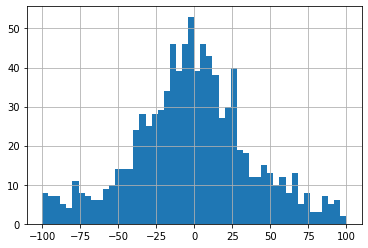

In [219]:
df = pd.DataFrame(data=simulation(12, 1000), columns=['result'])
plt = df['result'].hist(bins=50, range = [-100, 100])

# Weekly Rebalancing

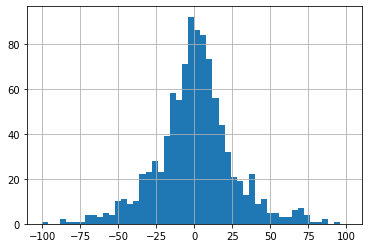

In [220]:
df = pd.DataFrame(data=simulation(52, 1000), columns=['result'])
plt = df['result'].hist(bins=50, range = [-100, 100])

# Daily Rebalancing

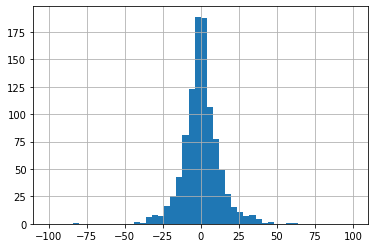

In [221]:
df = pd.DataFrame(data=simulation(252, 1000), columns=['result'])
plt = df['result'].hist(bins=50, range = [-100, 100])